# ARIMA Model - Stock Price Prediction

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv") 
stock_prices = stock_prices.set_index("Date")
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices.head()

,Adj Close,Return
Date,,
2015-03-19,185.758835,-0.456112
2015-03-20,187.398468,0.882668
2015-03-23,187.033279,-0.194873
2015-03-24,185.982346,-0.561897
2015-03-25,183.257004,-1.465377


Text(0, 0.5, 'Close Price')

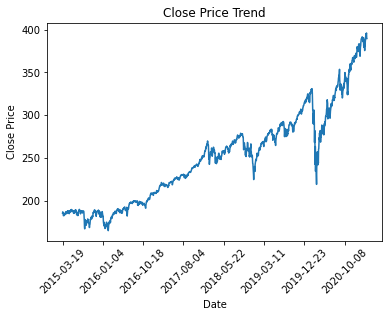

In [4]:
# Plot just the "Adj Close" column from the dataframe:
stock_prices["Adj Close"].plot(title="Close Price Trend", rot=45)
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

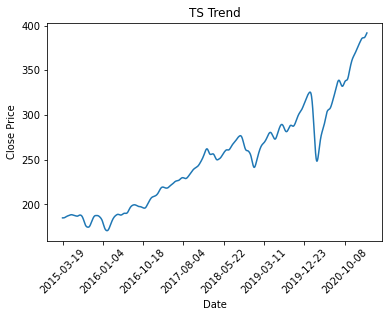

In [6]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Adj Close" price into two separate series:

ts_noise, ts_trend = sm.tsa.filters.hpfilter(stock_prices['Adj Close'])
ts_trend.plot(title= "TS Trend", rot=45)
plt.ylabel("Close Price")

<AxesSubplot:title={'center':'TS Noise'}, xlabel='Date'>

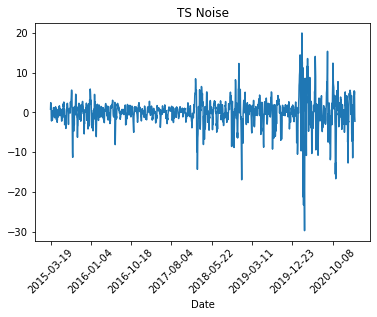

In [9]:
ts_noise.plot(title = "TS Noise", rot=45)

In [14]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:

close_prices = pd.DataFrame(stock_prices["Adj Close"])
close_prices["Trend"] = ts_trend
close_prices["Noise"] = ts_noise

close_prices.head()

,Adj Close,Trend,Noise
Date,,,
2015-03-19,185.758835,184.952408,0.806427
2015-03-20,187.398468,184.946929,2.451539
2015-03-23,187.033279,184.941954,2.091325
2015-03-24,185.982346,184.939519,1.042826
2015-03-25,183.257004,184.942968,-1.685964


Text(0, 0.5, 'Settle, Trend ($)')

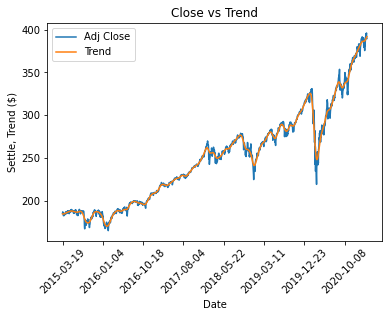

In [24]:
# Plot the Settle Price vs. the Trend for 2015 to the present

close_prices[["Adj Close","Trend"]].loc["2015":].plot(title = "Close vs Trend", rot=45)

plt.ylabel("Settle, Trend ($)")

Text(0, 0.5, 'Close, Noise ($)')

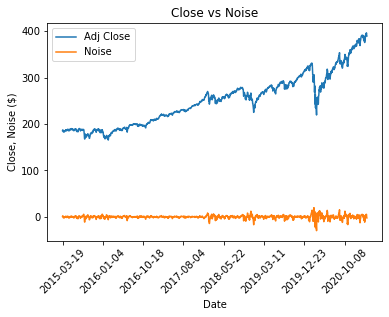

In [23]:
# Plot the Settle Noise

close_prices[["Adj Close","Noise"]].loc["2015":].plot(title = "Close vs Noise", rot=45)

plt.ylabel("Close, Noise ($)")

In [27]:
from statsmodels.tsa.arima_model import ARIMA
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))

model = ARIMA(close_prices["Adj Close"], order=(5, 1, 2))

# Fit the model

results = model.fit()

/Users/draganbogatic/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/draganbogatic/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/draganbogatic/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.


In [30]:
# Output model summary results:

print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1511
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3746.492
Method:                       css-mle   S.D. of innovations              2.888
Date:                Tue, 30 Mar 2021   AIC                           7510.984
Time:                        22:01:09   BIC                           7558.869
Sample:                             1   HQIC                          7528.816
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1352      0.070      1.921      0.055      -0.003       0.273
ar.L1.D.Adj Close    -0.4543      0.477     -0.953      0.340      -1.389       0.480
ar.L2.D.Adj Close     0.

In [ ]:
# p values of the lags are above our treshold of 0.05, thus our ARIMA model is not a good fit to make predictions for this dataset. We can tweak hyperparameters ARIMA(df, order=(p, d, q)) and see if that will improve the model perfomance.

In [39]:
price_forecast = pd.DataFrame(results.forecast(steps=5)[0])
price_forecast

,0
0,390.572217
1,388.869152
2,391.141253
3,389.363385
4,391.150787


Text(0.5, 0, 'Day')

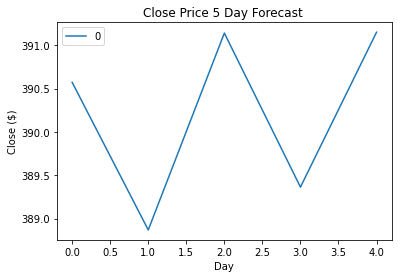

In [38]:
# Plot the 5 Day Price Forecast
price_forecast = pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Close Price 5 Day Forecast ")
plt.ylabel("Close ($)")
plt.xlabel("Day")